Marth Project

<br> Libraries needed: numpy, pylab, matplotlib, turtle, random, tkinter (if you want to run the last one)

Dragon Curve Using Complex Numbers

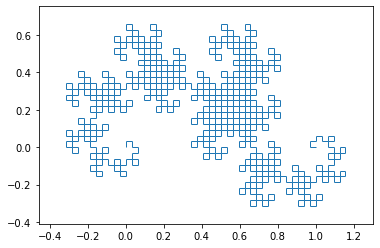

In [9]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

w = (0+0j)
z = (1+0j)
newSeg = []
segHolder = []
newSeg.append(((np.real(w),np.imag(w)),(np.real(z),np.imag(z))))
segHolder.append((w,z))

for i in range(0,10):
    length = len(segHolder)
    newSeg.clear()
    for j in range(0, len(segHolder)):
        #set up
        #assigning the w and z for this iteration
        w = segHolder[0][0]
        z = segHolder[0][1]
        #deleting the w and z that were just assigned
        segHolder.pop(0)

        #calculating
        w1 = ((1+1j)*w)/2
        z1 = ((1+1j)*z)/2
        w2 = 1 - ((1-1j)*w)/2
        z2 = 1 - ((1-1j)*z)/2
        
        #adding the x and y coordinates to a list in a way so that groups together the x and y for one point with the x and y with the other point in the line segment
        # ((x1,y1), (x2,y2))
        newSeg.append(((np.real(w1),np.imag(w1)),(np.real(z1),np.imag(z1))))
        newSeg.append(((np.real(w2),np.imag(w2)),(np.real(z2),np.imag(z2))))

        #adding the complex number of both points into a list that will be assigned as w and z later on
        segHolder.append((w1,z1))
        segHolder.append((w2,z2))

#variable for the list of points that will be plotted into lines
lines = newSeg

#the actual plotting of things
lc = mc.LineCollection(lines,linewidths=1)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

Gosper Curve

In [1]:
import turtle

def gosper_curve(order: int, size: int, is_A: bool = True) -> None:
    """Draw the Gosper curve."""
    if order == 0:
        turtle.forward(size)
        return
    for op in "A-B--B+A++AA+B-" if is_A else "+A-BB--B-A++A+B":
        gosper_op_map[op](order - 1, size)

gosper_op_map = {
    "A": lambda o, size: gosper_curve(o, size, True),
    "B": lambda o, size: gosper_curve(o, size, False),
    "-": lambda o, size: turtle.right(60),
    "+": lambda o, size: turtle.left(60),
}
size = 10
order = 1
gosper_curve(order, size)

Dragon Curve using L-System

In [1]:
import turtle

turtle.left(90)

def dragon_curve(order: int, size: int, is_F: bool = True) -> None:
    if order == 0:
        turtle.forward(size)
        return
    for op in "F+G" if is_F else "F-G":
        dragon_op_map[op](order - 1, size)

dragon_op_map = {
    "F": lambda o, size: dragon_curve(o, size, True),
    "G": lambda o, size: dragon_curve(o, size, False),
    "-": lambda o, size: turtle.right(90),
    "+": lambda o, size: turtle.left(90)
}
size = 10
order = 8
dragon_curve(order, size)

Original Fractal using L-System

In [10]:
import turtle
from random import randint
turtle.clearscreen()

swidth = 25
sheight = 25
colordex = 1

turtle.screensize(swidth, sheight)
turtle.setworldcoordinates(-swidth, -sheight, swidth, sheight)
turtle.colormode(255)
turtle.bgcolor(0,0,0)
tortle = turtle.Turtle()
tortle.pencolor("#ff7faa")
tortle.speed(10)
tortle.ht()
tertle = turtle.Turtle()
tertle.pencolor("#7fffd4")
tertle.speed(10)
tertle.ht()

savedState = []

def push(turtle):
    savedState.append([turtle.heading(), turtle.xcor(), turtle.ycor()])
    #print("push:" + str(savedState))
    #return turtle.heading(), turtle.position()

def pop(turtle, color):
    global colordex
    turtle.pencolor(color[colordex])
    turtle.up()
    turtle.setheading(savedState[-1][0])
    turtle.setposition(savedState[-1][1], savedState[-1][2])
    savedState.pop()
    #print("pop:" + str(savedState))
    turtle.down()
    if colordex < 10:
        colordex +=1
    else:
        colordex = 1
    #print(colordex)

def L_system_left(order: int, size: int, is_X: bool = True) -> None:
    if order == 0:
        #if(is_X != True):
        tortle.forward(size)
        return
    for op in "F+[[X]-X]-F[-FX]+X" if is_X else "FF":
        prod_rules_left[op](order - 1, size)

prod_rules_left = {
    "X": lambda o, size: L_system_left(o, size, True),
    "F": lambda o, size: L_system_left(o, size, False),
    "-": lambda o, size: tortle.right(45),
    "+": lambda o, size: tortle.left(45),
    "[": lambda o, size: push(tortle),
    "]": lambda o, size: pop(tortle, pinks)
}

def L_system_right(order: int, size: int, is_X: bool = True) -> None:
    if order == 0:
        #if(is_X != True):
        tertle.forward(size)
        return
    for op in "F-[[X]+X]+F[+FX]-X" if is_X else "FF":
        prod_rules_right[op](order - 1, size)

prod_rules_right = {
    "X": lambda o, size: L_system_right(o, size, True),
    "F": lambda o, size: L_system_right(o, size, False),
    "-": lambda o, size: tertle.right(45),
    "+": lambda o, size: tertle.left(45),
    "[": lambda o, size: push(tertle),
    "]": lambda o, size: pop(tertle, aquas)
}

aquas = {
    1: "#7fffd4",
    2: "#5cf9e0",
    3: "#32f2ec",
    4: "#00eaf8",
    5: "#00e1ff",
    6: "#00d8ff",
    7: "#00ceff",
    8: "#3dc3ff",
    9: "#62b7ff",
    10: "#7faaff"
}

pinks = {
    1: "#ff7faa",
    2: "#ff80a4",
    3: "#ff829f",
    4: "#ff849a",
    5: "#ff8694",
    6: "#ff8990",
    7: "#ff8b8b",
    8: "#ff8e87",
    9: "#ff9183",
    10: "#ff947f"
}

size = 1
order = 3
angle = 30
for i in range(0, int(360/angle)):
    tortle.up()
    tertle.up()
    tortle.setpos(0,0)
    tertle.setpos(0,0)
    tortle.seth(i*angle)
    tertle.seth(i*angle)
    tortle.down()
    tertle.down()
    L_system_left(order, size)
    L_system_right(order, size)
turtle.exitonclick()

Terminator: 

Capturing the Creation of the Fractal (don't try and run this because it will save 8495 images to you computer)

import turtle
from random import randint
import tkinter as _
_.ROUND=_.BUTT

def draw():
    swidth = 25
    sheight = 25
    colordex = 1

    turtle.screensize(swidth, sheight)
    turtle.setworldcoordinates(-swidth, -sheight, swidth, sheight)
    turtle.colormode(255)
    turtle.bgcolor(0,0,0)
    tortle = turtle.Turtle()
    tortle.pencolor("#ff7faa")
    tortle.speed(10)
    tortle.ht()
    tertle = turtle.Turtle()
    tertle.pencolor("#7fffd4")
    tertle.speed(10)
    tertle.ht()

    savedState = []

    def push(turtle):
        savedState.append([turtle.heading(), turtle.xcor(), turtle.ycor()])
        #print("push:" + str(savedState))
        #return turtle.heading(), turtle.position()

    def pop(turtle, color):
        global colordex
        turtle.pencolor(color[colordex])
        turtle.up()
        turtle.setheading(savedState[-1][0])
        turtle.setposition(savedState[-1][1], savedState[-1][2])
        savedState.pop()
        #print("pop:" + str(savedState))
        turtle.down()
        if colordex < 10:
            colordex +=1
        else:
            colordex = 1
        #print(colordex)

    def L_system_left(order: int, size: int, is_X: bool = True) -> None:
        if order == 0:
            #if(is_X != True):
            tortle.forward(size)
            return
        for op in "F+[[X]-X]-F[-FX]+X" if is_X else "FF":
            prod_rules_left[op](order - 1, size)

    prod_rules_left = {
        "X": lambda o, size: L_system_left(o, size, True),
        "F": lambda o, size: L_system_left(o, size, False),
        "-": lambda o, size: tortle.right(45),
        "+": lambda o, size: tortle.left(45),
        "[": lambda o, size: push(tortle),
        "]": lambda o, size: pop(tortle, pinks)
    }

    def L_system_right(order: int, size: int, is_X: bool = True) -> None:
        if order == 0:
            #if(is_X != True):
            tertle.forward(size)
            return
        for op in "F-[[X]+X]+F[+FX]-X" if is_X else "FF":
            prod_rules_right[op](order - 1, size)

    prod_rules_right = {
        "X": lambda o, size: L_system_right(o, size, True),
        "F": lambda o, size: L_system_right(o, size, False),
        "-": lambda o, size: tertle.right(45),
        "+": lambda o, size: tertle.left(45),
        "[": lambda o, size: push(tertle),
        "]": lambda o, size: pop(tertle, aquas)
    }

    aquas = {
        1: "#7fffd4",
        2: "#5cf9e0",
        3: "#32f2ec",
        4: "#00eaf8",
        5: "#00e1ff",
        6: "#00d8ff",
        7: "#00ceff",
        8: "#3dc3ff",
        9: "#62b7ff",
        10: "#7faaff"
    }

    pinks = {
        1: "#ff7faa",
        2: "#ff80a4",
        3: "#ff829f",
        4: "#ff849a",
        5: "#ff8694",
        6: "#ff8990",
        7: "#ff8b8b",
        8: "#ff8e87",
        9: "#ff9183",
        10: "#ff947f"
    }

    size = 1
    order = 3
    angle = 30
    for i in range(0, int(360/angle)):
        tortle.up()
        tertle.up()
        tortle.setpos(0,0)
        tertle.setpos(0,0)
        tortle.seth(i*angle)
        tertle.seth(i*angle)
        tortle.down()
        tertle.down()
        L_system_left(order, size)
        L_system_right(order, size)

    turtle.ontimer(stop, 500)  # stop the recording (1/2 second trailer)

running = True
FRAMES_PER_SECOND = 10

def stop():
    global running

    running = False

def save(counter=[1]):
    turtle.getcanvas().postscript(file = "marth{0:03d}.eps".format(counter[0]))
    counter[0] += 1
    if running:
        turtle.ontimer(save, int(1000 / FRAMES_PER_SECOND))

save()  # start the recording

turtle.ontimer(draw, 500)  # start the program (1/2 second leader)

turtle.done()
